In [1]:
import pandas as pd

In [2]:
patch_responses = pd.read_csv("resources/linux/resources/filtered_responses.csv")
patch_responses.head()

,Unnamed: 0,patch_id,response_author,resp_parent,resp_msg_id,upstream,response_is_bot,bot_name,patch_author,responder,self_response
0,0,<000000000000e87d14058e9728d7@google.com>,"""Michael S. Tsirkin"" <mst@redhat.com>",<000000000000e87d14058e9728d7@google.com>,<20190728043619-mutt-send-email-mst@kernel.org>,NaN,False,NaN,"('hillf danton', 'hdanton@sina.com')","('michael s. tsirkin', 'mst@redhat.com')",False
1,1,<000000000000e87d14058e9728d7@google.com>,Linus Torvalds <torvalds@linux-foundation.org>,<000000000000e87d14058e9728d7@google.com>,<CAHk-=whnM5+FBJuVoxXELvFgecuc0+vW7ibWy4Gc5qJb...,NaN,False,NaN,"('hillf danton', 'hdanton@sina.com')","('linus torvalds', 'torvalds@linux-foundation....",False
2,2,<20190608051309.4689-1-jontio@i4free.co.nz>,Johan Hovold <johan@kernel.org>,<20190608051309.4689-1-jontio@i4free.co.nz>,<20190620134318.GL6241@localhost>,NaN,False,NaN,"('jontio', 'jontio@i4free.co.nz')","('johan hovold', 'johan@kernel.org')",False
3,3,<000101d5abdc$61acff60$2506fe20$@emc.com.tw>,Dmitry Torokhov <dmitry.torokhov@gmail.com>,<000101d5abdc$61acff60$2506fe20$@emc.com.tw>,<20191207203317.GS50317@dtor-ws>,NaN,False,NaN,"('dave.wang', 'dave.wang@emc.com.tw')","('dmitry torokhov', 'dmitry.torokhov@gmail.com')",False
4,4,<CAODfWeH67_ZfO7yrrQ+EcFgXd8stA23y6hUtimhzEbXv...,Jonathan Corbet <corbet@lwn.net>,<CAODfWeH67_ZfO7yrrQ+EcFgXd8stA23y6hUtimhzEbXv...,<20191029032130.444c6fce@lwn.net>,NaN,False,NaN,"('j)zr&r3n&\x18ín\x1a', 'hector.oron@gmail.com')","('jonathan corbet', 'corbet@lwn.net')",False


In [3]:
patch_responses['response_author'].nunique()

4713

#### From: Patch Author <author@example.com>
indicates the original author, signed-off-by's increase on the way (not necessariliy coming from the reviewers).

In [4]:
from pypasta.Repository.Repository import Repository

repo = Repository('./resources/linux/repo')

def get_author(upstream):
    try:
        author = repo.get_commit(upstream).author
        return author.name + ' <' + author.email + '>'
    except:
        return None

In [5]:
patch_responses['commit_author'] = patch_responses['upstream'].apply(get_author)

In [6]:
patch_responses['commit_author'].nunique()

1585

In [7]:
# patch_responses['reviewed-by'] = patch_responses['responses.message']\
#                                 .apply(lambda bytes_array: get_tags(bytes_array, 'reviewed-by'))

In [8]:
# cols = ['cluster_id', 'upstream', 'responses.resp_msg_id','responses.message', 'author', 'reviewed-by']
# index = ['cluster_id', 'upstream', 'responses.resp_msg_id','responses.message', 'author']
# patch_responses_long = patch_responses[cols].set_index(index)

In [9]:
# patch_responses_long = pd.melt(patch_responses_long['reviewed-by'].apply(pd.Series).reset_index(), 
#             id_vars=index,
#             value_name='reviewed-by').sort_index()
# patch_responses_long.drop('variable', axis=1, inplace=True)

In [10]:
#patch_responses_long.to_csv('df_with_tags_commits.csv')

In [11]:
#patch_responses_long = pd.read_csv('df_with_tags_commits.csv')

In [12]:
from scipy import stats
import matplotlib.pyplot as plt

#### Compare number of Reviewed-by vs. email responses per author 
(Do Reviewed-by tags and number of emails generally correlate among authors?)

What is the Reviewed-by to email responses ratio per author? Is this distribution of ratio concentrated around one value (there is "one common ratio preference among developers"), equally distributed in the scale (everyone has a different preference of use), or clustered among the scale (there are different parties of preference).

In [13]:
# authors = patch_responses_long[['author', 'responses.resp_msg_id', 'reviewed-by']]\
#                             .groupby('author')\
#                             .count()\
#                             .sort_values(['responses.resp_msg_id', 'reviewed-by'], ascending=False)

In [14]:
# authors['ratio'] = authors.apply(lambda row: row['reviewed-by']/row['responses.resp_msg_id'], axis = 1)

In [15]:
# authors.head()

This ratio probably doesn't mean too much, but we do know that there's a significant corr between 'responses.resp_msg_id', 'reviewed-by'. What to do with them?

In [16]:
# authors.ratio.loc[lambda x: x != 0].mean()

#### Does many responses mean many reviews?

In [17]:
# authors[['responses.resp_msg_id', 'reviewed-by']].corr()

In [18]:
# slope, intercept, r_value, p_value, std_err = stats.linregress(authors['responses.resp_msg_id'],
#                                                                authors['reviewed-by'])

# plt.plot(authors['responses.resp_msg_id'], authors['reviewed-by'], 'o')
# #plt.plot(authors['responses.resp_msg_id'], intercept + slope*authors['responses.resp_msg_id'], 'r', label='fitted line')
# #plt.legend()

# # plt.show()

In [19]:
# r_value ** 2

In [20]:
# p_value

In [21]:
patch_responses_relations = patch_responses[['commit_author', 'response_author', 'resp_msg_id']]\
                                    .groupby(['commit_author', 'response_author'])\
                                    .nunique()[['resp_msg_id']]\
                                    .sort_values('resp_msg_id', ascending=False)\
                                    .reset_index()
# patch_responses_relations['commit_author'] = patch_responses_relations['author'].astype('category')
# patch_responses_relations['reviewed-by'] = patch_responses_relations['reviewed-by'].astype('category')

patch_responses_relations.head()

,commit_author,response_author,resp_msg_id
0,Chris Wilson <chris@chris-wilson.co.uk>,Patchwork <patchwork@emeril.freedesktop.org>,658
1,Chris Wilson <chris@chris-wilson.co.uk>,Chris Wilson <chris@chris-wilson.co.uk>,639
2,Christoph Hellwig <hch@lst.de>,"""Darrick J. Wong"" <darrick.wong@oracle.com>",160
3,Chris Wilson <chris@chris-wilson.co.uk>,Tvrtko Ursulin <tvrtko.ursulin@linux.intel.com>,151
4,Kuninori Morimoto <kuninori.morimoto.gx@renesa...,Mark Brown <broonie@kernel.org>,109


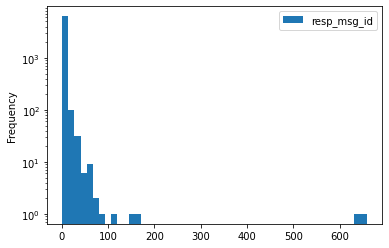

In [22]:
patch_responses_relations[['commit_author','response_author','resp_msg_id']]\
                        .plot.hist(bins = 50, logy = True)

In [23]:
# !pip install python-louvain pygraphviz networkx
# !conda install pygraphviz

In [24]:
import networkx as nx

G=nx.Graph()

G.add_nodes_from(patch_responses_relations['response_author'])
G.add_nodes_from(patch_responses_relations['commit_author'])
G.add_weighted_edges_from(patch_responses_relations.values.tolist())

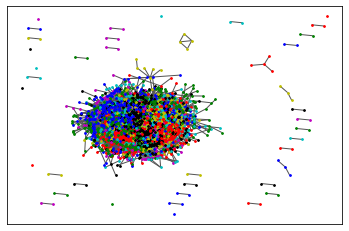

<Figure size 432x288 with 0 Axes>

In [25]:
from community import community_louvain
import matplotlib.cm as cm
import numpy as np 
import matplotlib.colors as mcolors

partition = community_louvain.best_partition(G)

import itertools

colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])

#drawing
size = float(len(set(partition.values())))
pos = nx.nx_agraph.graphviz_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 3,
                        node_color = np.array([next(colors)]))

#nx.draw_networkx_labels(G,pos=nx.spring_layout(G), font_size = 5)

edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())

# To divide the edge weights into bins proportional to max
max_weight = max(weights)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.66*max_weight]
emedium = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.1*max_weight and  d['weight'] < 0.66*max_weight]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < 0.1*max_weight]

# elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.75*max_weight]
# emedium = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.50*max_weight and  d['weight'] < 0.75*max_weight]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.25*max_weight and  d['weight'] < 0.50*max_weight]
# ealmostnone = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < 0.25*max_weight]

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color=str(1))#mcolors.CSS4_COLORS['black'])
nx.draw_networkx_edges(G, pos, edgelist=emedium, edge_color=str(0.66))#mcolors.CSS4_COLORS['dimgray'])
nx.draw_networkx_edges(G, pos, edgelist=esmall, edge_color=str(0.33))#mcolors.CSS4_COLORS['silver'])

#nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=weights, edge_cmap=cm.Greys)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('plot_commits.png', dpi=1000)

/home/q503670/miniconda3/envs/pasta/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/q503670/miniconda3/envs/pasta/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38515 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/q503670/miniconda3/envs/pasta/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/q503670/miniconda3/envs/pasta/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/q503670/miniconda3/envs/pasta/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/q503670/miniconda3/envs/

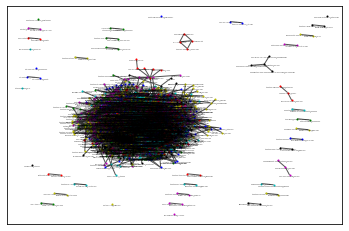

<Figure size 432x288 with 0 Axes>

In [26]:
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 1,
                        node_color = np.array([next(colors)]))

nx.draw_networkx_labels(G, pos, font_size = 1)

# edges drawn with 3 weight categories
nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color=str(1))
nx.draw_networkx_edges(G, pos, edgelist=emedium, edge_color=str(0.66))
nx.draw_networkx_edges(G, pos, edgelist=esmall, edge_color=str(0.33))


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('plot_commits_labeled.png', dpi=1000)

To investigate relations between persons both from the groups of reviewers and developers, an undirected graph is created. Each node in the graph repsresent a person. Edges represent email exchange between two persons. Edges are weighted according to number of emails.

This graph demonstrates persons whose commits were included in the repository and the persons who reviewed these commits in the process before.

The Louvain method for community detection is used to divide the graph into groups. Communities are represented with node colors in the visualization.

For the sake of simplicity and readibility, only three levels of edge weights are shown in the visualization. Darker edges represent more email exchange.